In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
from datetime import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path

import ultralytics
from ultralytics import YOLO

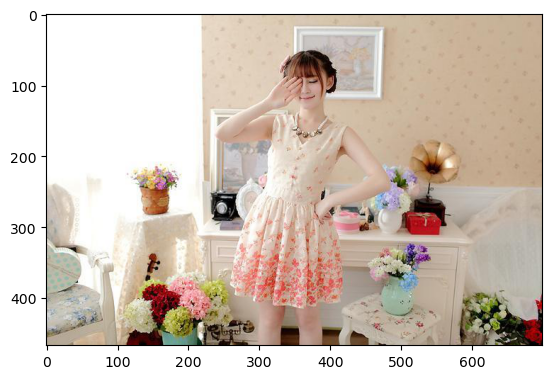

In [2]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:

img_id = "003598"
image = mpimg.imread(f"F:/UNI/Proposal Skripsi/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [3]:
# Initialize Directory
train_dir = "F:/Skripsi/deepfashion2_dataset_filter/train/pos/img"
train_label = "F:/Skripsi/deepfashion2_dataset_filter/train/pos/label"
val_dir = "F:/Skripsi/deepfashion2_dataset_filter/val/img"
val_label = "F:/Skripsi/deepfashion2_dataset_filter/val/label"
test_dir = "F:/Skripsi/deepfashion2_dataset_filter/test/"

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.0+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
Setup complete  (8 CPUs, 19.7 GB RAM, 211.7/280.4 GB disk)


In [6]:
model = YOLO('yolov8n.pt')
results = model.train(data='F:/Skripsi/yaml/deepfashion2.yaml', epochs=1)

if results:
    current_time = datetime.datetime.now()
    directory_name = f"F:/Skripsi/models/{current_time.year}{current_time.month:02d}{current_time.day:02d}_{current_time.hour:02d}{current_time.minute:02d}{current_time.second:02d}"
    
    # create dir
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save results to the specified directory
    results.save(directory_name)
    print(f"Results saved to {directory_name}")
else:
    print("No Results")

New https://pypi.org/project/ultralytics/8.0.201 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.0+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=F:/Skripsi/yaml/deepfashion2.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augme

KeyboardInterrupt: 